In [1]:
from fastbook import *
from fastai.tabular.all import *
import os
import nfl_data_py as nfl
import numpy as np
import pandas as pd

In [2]:
# Calculate Expected Pass Rate

In [3]:
# Set CONSTANTS
SEASONS = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
# SEASONS = [2015,2016,2017,2018,2019]

In [4]:
# get play by play for season
cols = ['game_id',
        'play_id',
        'epa',
        'season_type',
        'season','week',
        'qtr',
        'drive','series',
        'down',
        'ydstogo',
        'yards_gained',
        'wp',
        'ep',
        'yardline_100',
        'home_team',
        'away_team',
        'posteam','posteam_score',
        'defteam','defteam_score',
        'posteam_timeouts_remaining',
        'defteam_timeouts_remaining',
        'half_seconds_remaining',
        'game_half',
        'fixed_drive_result',
        'play_type',
        'penalty_team',
        'penalty_type',
        'penalty_yards']

df_pbp = nfl.import_pbp_data(years=SEASONS, columns=cols, downcast=True, cache=False)

2006 done.
2007 done.
2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
Downcasting floats.


In [129]:
df_pbp['score_diff'] = df_pbp.posteam_score - df_pbp.defteam_score
df_pbp['home'] = np.select([df_pbp.posteam == df_pbp.home_team],[1], default=0) 

In [130]:
is_down = df_pbp['down'].isin([1,2,3,4])
is_runpass = df_pbp['play_type'].isin(['run','pass'])


df = df_pbp.loc[(is_runpass & is_down), ['play_type','season','season_type','score_diff','home','down','ydstogo','yardline_100','game_half','qtr','half_seconds_remaining','wp']].dropna().copy()
print(df.play_type.value_counts())
df.sample(25)

pass    312943
run     224644
Name: play_type, dtype: int64


,play_type,season,season_type,score_diff,home,down,ydstogo,yardline_100,game_half,qtr,half_seconds_remaining,wp
501391,pass,2016,REG,7.0,0,2.0,10.0,80.0,Half1,2.0,389.0,0.704927
609590,pass,2018,REG,-13.0,0,1.0,10.0,72.0,Half1,2.0,390.0,0.119933
667280,run,2019,REG,14.0,1,1.0,10.0,59.0,Half2,3.0,1564.0,0.938833
454097,pass,2015,REG,4.0,1,2.0,9.0,78.0,Half1,1.0,918.0,0.707144
35182,pass,2006,REG,-24.0,0,1.0,10.0,44.0,Half2,3.0,1242.0,0.008703
190088,pass,2010,REG,3.0,1,1.0,10.0,31.0,Half1,1.0,1253.0,0.773025
71438,pass,2007,REG,-16.0,0,1.0,10.0,52.0,Half1,1.0,1093.0,0.147634
672837,run,2020,REG,5.0,0,1.0,10.0,75.0,Half2,4.0,752.0,0.759348
602467,pass,2018,REG,0.0,1,3.0,7.0,31.0,Half1,2.0,541.0,0.573489
11432,run,2006,REG,-7.0,1,2.0,2.0,72.0,Half2,3.0,1517.0,0.302881


In [7]:
df.dtypes

play_type                  object
season                      int64
season_type                object
score_diff                float32
home                        int64
down                      float32
ydstogo                   float32
yardline_100              float32
game_half                  object
qtr                       float32
half_seconds_remaining    float32
wp                        float32
dtype: object

In [8]:
procs = [Categorify, FillMissing, Normalize]
cat_names = ['season', 'season_type','home','down','qtr','game_half']
cont_names = ['score_diff','wp','ydstogo','yardline_100','half_seconds_remaining']

In [9]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))
# splits = TrainTestSplitter(test_size=0.2, random_state=None, stratify='play_type',
#                     train_size=None, shuffle=True)

In [10]:
to = TabularPandas(df, procs=procs,
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='play_type',
                   splits=splits)

In [11]:
dls = to.dataloaders(bs=64)

In [12]:
dls.show_batch()

,season,season_type,home,down,qtr,game_half,wp_na,score_diff,wp,ydstogo,yardline_100,half_seconds_remaining,play_type
0,2009,REG,1,1.0,3.0,Half2,False,-2.100000e+01,0.052281,10.0,70.000001,1299.999985,pass
1,2014,REG,0,2.0,2.0,Half1,False,7.000000e+00,0.604107,16.0,90.000000,730.000002,pass
2,2013,REG,0,1.0,1.0,Half1,False,3.000000e+00,0.665903,10.0,35.000000,1414.999968,run
3,2018,REG,1,2.0,1.0,Half1,False,6.756346e-08,0.571698,6.0,50.000000,1534.000019,run
4,2011,REG,1,3.0,2.0,Half1,False,-1.700000e+01,0.098167,12.0,65.000000,455.000007,pass
5,2012,REG,0,1.0,2.0,Half1,False,-3.000000e+00,0.512552,10.0,32.000000,97.999983,pass
6,2015,REG,1,2.0,3.0,Half2,False,1.400000e+01,0.918633,2.0,75.000000,1764.999969,run
7,2008,REG,0,2.0,3.0,Half2,False,2.000000e+01,0.982396,8.0,26.999999,1189.000005,run
8,2021,REG,0,1.0,5.0,Overtime,False,6.756346e-08,0.414913,10.0,80.000001,373.000003,pass
9,2014,REG,0,1.0,1.0,Half1,False,-7.000000e+00,0.290496,10.0,80.000001,1296.000014,run


In [13]:
learn = tabular_learner(dls, metrics=accuracy)

In [14]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.570154,0.562126,0.695555,01:16


In [15]:
preds, y, loss = learn.get_preds(with_loss=True)
acc = accuracy(preds,y)
print('The accuracy is {0}%.'.format(acc))

The accuracy is 0.6955551505088806%.


In [16]:
learn.show_results()

,season,season_type,home,down,qtr,game_half,wp_na,score_diff,wp,ydstogo,yardline_100,half_seconds_remaining,play_type,play_type_pred
0,16.0,2.0,2.0,2.0,4.0,2.0,1.0,1.152887,1.539599,-1.422666,0.984212,-0.603089,1.0,1.0
1,2.0,2.0,1.0,3.0,1.0,1.0,1.0,0.139604,-0.259867,-1.422666,0.290400,1.597172,0.0,0.0
2,9.0,2.0,2.0,1.0,2.0,1.0,1.0,1.429237,1.273497,0.364258,1.065837,-0.538321,1.0,1.0
3,13.0,2.0,2.0,1.0,2.0,1.0,1.0,0.415954,0.818692,0.364258,0.290400,-0.092347,1.0,1.0
4,8.0,2.0,2.0,2.0,2.0,1.0,1.0,-0.228863,0.220021,-0.146292,-1.056414,-1.087923,0.0,0.0
5,7.0,2.0,1.0,1.0,2.0,1.0,1.0,1.797704,1.380433,0.364258,0.780150,-1.404361,0.0,0.0
6,2.0,2.0,2.0,3.0,3.0,2.0,1.0,-1.426381,-1.521261,-1.933215,-0.403413,0.122313,0.0,1.0
7,6.0,2.0,2.0,3.0,1.0,1.0,1.0,0.139604,0.092385,0.108983,-0.240163,0.324019,0.0,0.0
8,10.0,2.0,1.0,2.0,1.0,1.0,1.0,1.060771,0.597314,-0.912116,1.555588,0.307364,1.0,1.0


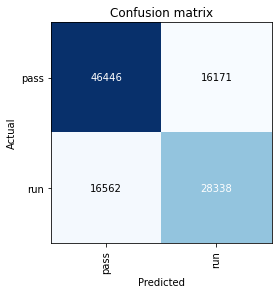

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [18]:
from sklearn.metrics import roc_curve, auc
probs = (preds[:,1])
# compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs)

# Compute ROC area
roc_auc = auc(fpr,tpr)
print(f'ROC area is {roc_auc}')

ROC area is 0.7670025882594553


In [19]:
print(preds)
print(probs)

tensor([[0.4170, 0.5830],
        [0.2676, 0.7324],
        [0.9456, 0.0544],
        ...,
        [0.4667, 0.5333],
        [0.3914, 0.6086],
        [0.4699, 0.5301]])
tensor([0.5830, 0.7324, 0.0544,  ..., 0.5333, 0.6086, 0.5301])


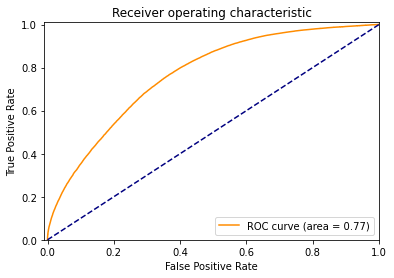

In [20]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


In [21]:
test_df = df.copy()
test_df.drop(['play_type'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)
preds = learn.get_preds(dl=dl)

In [76]:
df['xp'] = preds[0][:,0]

In [77]:

df['play_type_class'] = np.select([df['play_type'] == 'pass', df['play_type'] == 'run'],[1,0], default=0)

df['bin_pred_prob'] = round(df['xp'] / 0.05) * 0.05

df['situation'] = np.select([((df.down == 1) & (df.ydstogo == 10)),
                             (df.down == 2),
                             (df.down == 3)],
                            ['1st & 10', '2nd down', '3rd down'], default = 'Other')
df_xp=(df.groupby(['situation', 'bin_pred_prob']).agg({'play_type_class':[('n_plays','count'),('n_complete', 'sum')]})
 .droplevel(level=0, axis=1)
 .reset_index()
 .assign(bin_actual_prob= lambda x: x.n_complete / x.n_plays)
)
df_xp

,situation,bin_pred_prob,n_plays,n_complete,bin_actual_prob
0,1st & 10,0.00,10,1,0.100000
1,1st & 10,0.05,1727,27,0.015634
2,1st & 10,0.10,2364,134,0.056684
3,1st & 10,0.15,1756,153,0.087130
4,1st & 10,0.20,1957,285,0.145631
...,...,...,...,...,...
79,Other,0.80,1220,997,0.817213
80,Other,0.85,1219,1045,0.857260
81,Other,0.90,1674,1471,0.878734
82,Other,0.95,2144,2039,0.951026


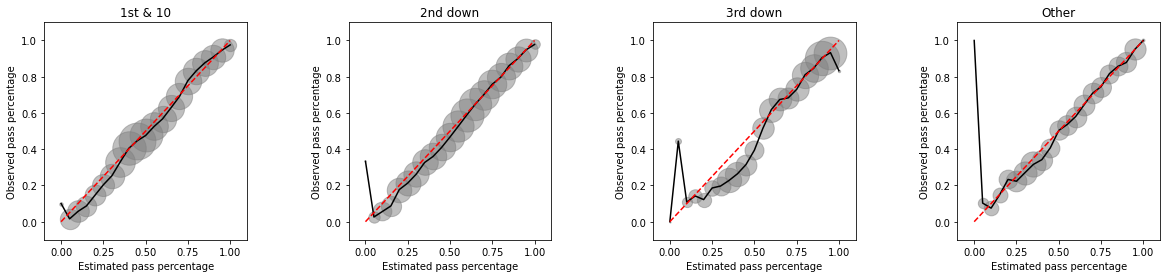

In [92]:
# from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = (0,1)
        low_y, high_y = (0,1)
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes


fig, ax = subplots(1,4, figsize=(20,4))
fig.subplots_adjust(wspace=0.5)
for idx, situation in enumerate(df_xp.situation.unique()):
    for row_idx, row in df_xp[df_xp.situation == situation].iterrows():
        ax[idx].scatter(x=row.bin_pred_prob, y=row.bin_actual_prob, s=np.log(row.n_plays)**3, alpha=0.5,color='grey')
    ax[idx].plot('bin_pred_prob', 'bin_actual_prob', data=df_xp[df_xp.situation == situation], color='k')
    add_identity(ax[idx], color='r', ls='--')
    ax[idx].set_title(situation)
    ax[idx].set_xlim([-0.1,1.1])
    ax[idx].set_ylim([-0.1,1.1])
    ax[idx].set_xlabel('Estimated pass percentage')
    ax[idx].set_ylabel('Observed pass percentage')
    

plt.show()

In [128]:
# Calculate error between expected and observed

wm = lambda x: np.average(x, weights=df_xp.loc[x.index, "n_plays"])

df_xp['cal_diff'] = abs(df_xp.bin_pred_prob - df_xp.bin_actual_prob)
xp_cv_cal_error = df_xp.groupby('situation').agg(n_complete=('n_complete','sum'),weighted_cal_error=('cal_diff',wm))
round(np.average(xp_cv_cal_error.weighted_cal_error, weights=xp_cv_cal_error.n_complete),4)


0.0188

In [106]:
# https://www.opensourcefootball.com/posts/2020-09-28-nflfastr-ep-wp-and-cp-models/#expected-pass-model-calibration-results
# model calibration of NFLverse  Expected Pass Model is 0.008

situation
1st & 10    21
2nd down    21
3rd down    21
Other       21
Name: cal_diff, dtype: int64